# Chapter 3: Methodology

## 3.1 Research Strategy 

Success Metrics
Approach: See main submission

## 3.2 Data Collection and Preprocessing

In [130]:
# Import Libraries and Dependencies

import warnings
warnings.filterwarnings('ignore')

# Dependencies for data cleaning, analysis and manipulation
import pandas as pd
import numpy as np
import statistics
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm

#Dependencies for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import scikitplot as skplt

#Dependencies for Feature Extraction and Engineering

# SKLEARN is installed from scikit-learn as sklearn is deperecated
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Dependencies for five (5) Model Creation 

#Dependencies for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Dependencies for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

#Dependencies for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Dependencies for Support Vector Machines
from sklearn.svm import SVC

#Dependencies for K-Nearest Neighbours (KNN)
# from sklearn.neighbors import KNeighborsClassifier

#Dependencies for Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, classification_report, roc_curve,auc, f1_score, precision_score, recall_score, roc_auc_score
import sklearn.metrics as metrics


# Data Collection

In [131]:
# Data collection from data source

german_credit_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)

column_headers = ["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]

german_credit_data.columns = column_headers

#Save as CSV file
german_credit_data.to_csv("germancreditdata.csv",index=False)

#Read data from CSV file
ger_credit_df = pd.read_csv("germancreditdata.csv")

ger_credit_df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


There are 700 loans repaid on time (Good Risk, Cost Matrix(Risk) =1) and 300 loans defaulted (Bad Risk, Cost Matrix(Risk)=2) in the dataset


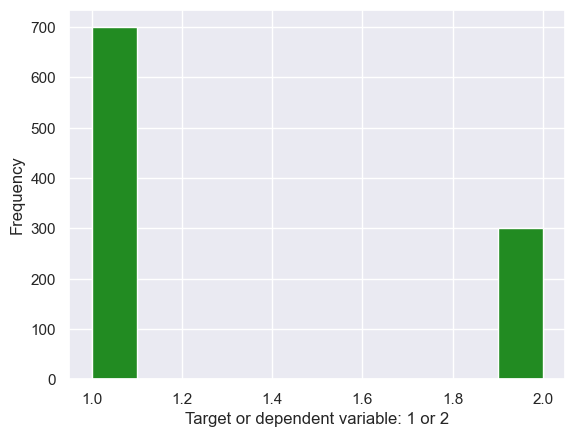

In [132]:
# Target data distribution

ger_credit_df['Cost Matrix(Risk)'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target or dependent variable: 1 or 2');

count = ger_credit_df['Cost Matrix(Risk)'].value_counts()
good_risk = count[1]
bad_risk = count[2]

print("There are {} loans repaid on time (Good Risk, Cost Matrix(Risk) =1) and {} loans defaulted (Bad Risk, Cost Matrix(Risk)=2) in the dataset".format(good_risk, bad_risk))

### Data description

::: German Credit Data:::

1000 entries make up the dataset, which also includes 20 independent variables (13 categorical, 7 numerical), and 1 target variable created by Prof. Hofmann. Each entry in this collection reflects a person who accepts a bank credit. Depending on a set of factors, each person is categorised as either a good or bad credit risk.

::: USA Credit Data :::



# Data Preprocessing

In [133]:

# The current CSV file collected contains keys like "A14, A61" for each of the columns
# UCI provides a description of each of this keys. 
# To proceed we need to map this these keys/entries to their respective descriptions by creating 
# a dictionary with a key-value pair for each feature. The key represents current entry, while values represent description
# and using the .map() iterative method. The map() method creates a new array populated with 
# the results of calling a provided function on every element in the calling array.



#Key-Value Pair for 13 categorical features
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
Telephone={'A192':"yes", 'A191':"none"}
foreign_worker={'A201':"yes", 'A202':"no"}
risk={1:"Good Risk", 2:"Bad Risk"}

#Using Map function to replace values in the columns
ger_credit_df["Status of existing checking account"]=ger_credit_df["Status of existing checking account"].map(Status_of_existing_checking_account)
ger_credit_df["Credit history"]=ger_credit_df["Credit history"].map(Credit_history)
ger_credit_df["Purpose"]=ger_credit_df["Purpose"].map(Purpose)
ger_credit_df["Savings account/bonds"]=ger_credit_df["Savings account/bonds"].map(Saving_account)
ger_credit_df["Present employment since"]=ger_credit_df["Present employment since"].map(Present_employment)
ger_credit_df["Personal status and sex"]=ger_credit_df["Personal status and sex"].map(Personal_status_and_sex)
ger_credit_df["Other debtors / guarantors"]=ger_credit_df["Other debtors / guarantors"].map(Other_debtors_guarantors)
ger_credit_df["Property"]=ger_credit_df["Property"].map(Property)
ger_credit_df["Other installment plans"]=ger_credit_df["Other installment plans"].map(Other_installment_plans)
ger_credit_df["Housing"]=ger_credit_df["Housing"].map(Housing)
ger_credit_df["Job"]=ger_credit_df["Job"].map(Job)
ger_credit_df["Telephone"]=ger_credit_df["Telephone"].map(Telephone)
ger_credit_df["foreign worker"]=ger_credit_df["foreign worker"].map(foreign_worker)
ger_credit_df["Cost Matrix(Risk)"]=ger_credit_df["Cost Matrix(Risk)"].map(risk)


ger_credit_df.head(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [134]:
#Rename Column 

ger_credit_df.rename(columns = {'Cost Matrix(Risk)':'Credit Risk'}, inplace = True)
ger_credit_df.head(5)


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit Risk
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [135]:
#Save a copy of the dataset
backup_ger_credit_df = ger_credit_df
backup_ger_credit_df.head(5)
ger_credit_df.head(2)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit Risk
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk


# Data Understanding

In [136]:
# Data Overview
ger_credit_df.shape

(1000, 21)

In [137]:
ger_credit_df.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [138]:
# Checking for null values 
ger_credit_df.isna().sum(axis = 0)

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [140]:

#Statistical view of numerical variables
ger_credit_df[["Credit amount",\
               "Duration in month",\
               "Installment rate in percentage of disposable income",\
               "Age in years",\
               "Present residence since",\
               "Number of existing credits at this bank",\
               "Number of people being liable to provide maintenance for"
               
              ]].describe()


# .to_csv("stats_credit2.csv", index=False)

# ger_credit_df

,Credit amount,Duration in month,Installment rate in percentage of disposable income,Age in years,Present residence since,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,2.973000,35.546000,2.845000,1.407000,1.155000
std,2822.736876,12.058814,1.118715,11.375469,1.103718,0.577654,0.362086
min,250.000000,4.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,1365.500000,12.000000,2.000000,27.000000,2.000000,1.000000,1.000000
50%,2319.500000,18.000000,3.000000,33.000000,3.000000,1.000000,1.000000
75%,3972.250000,24.000000,4.000000,42.000000,4.000000,2.000000,1.000000
max,18424.000000,72.000000,4.000000,75.000000,4.000000,4.000000,2.000000


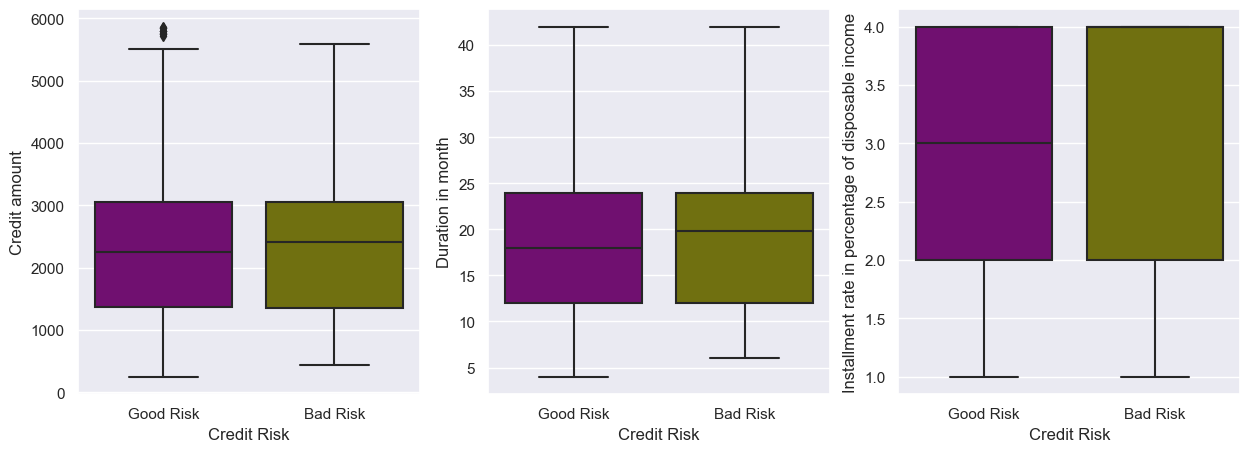

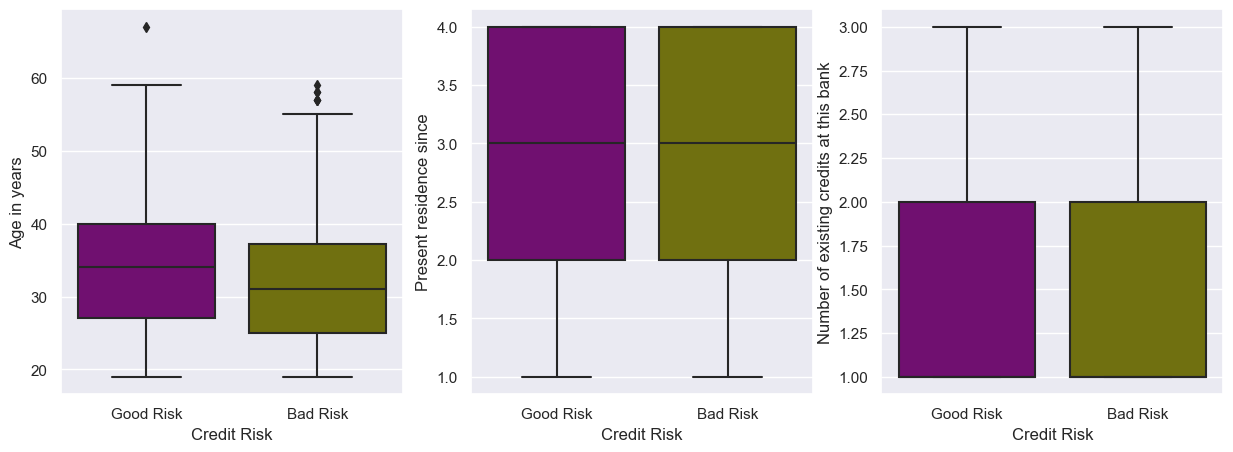

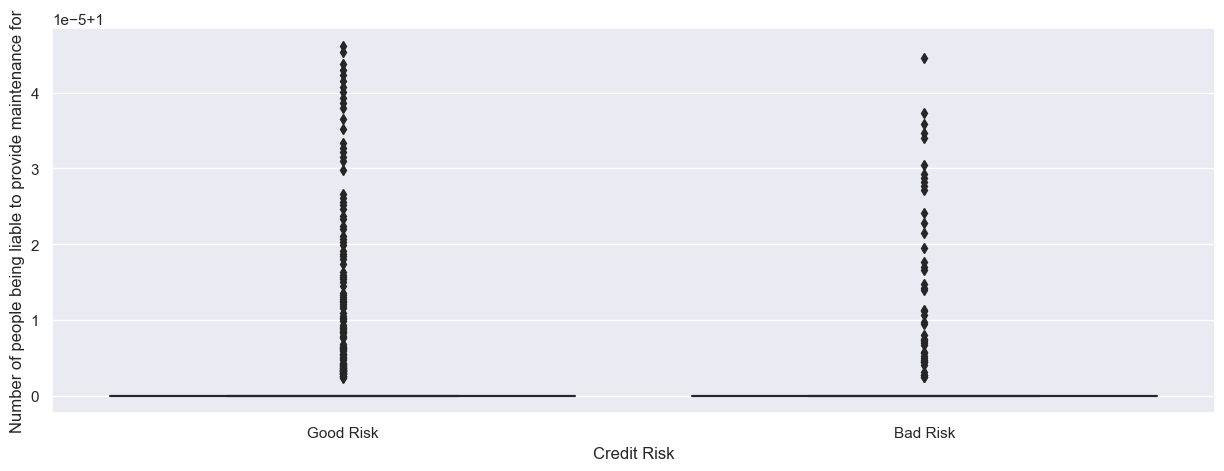

In [176]:
#Checking for and removal of outliers

sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=ger_credit_df["Credit amount"],x=ger_credit_df["Credit Risk"],orient='v' , ax=axes[0],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=ger_credit_df["Duration in month"],x=ger_credit_df["Credit Risk"], orient='v' , ax=axes[1],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=ger_credit_df["Installment rate in percentage of disposable income"],x=ger_credit_df["Credit Risk"], orient='v' , ax=axes[2],palette=["#800080","#808000"]) #box plot

plt.show()

sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=ger_credit_df["Age in years"],x=ger_credit_df["Credit Risk"],orient='v' , ax=axes[0],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=ger_credit_df["Present residence since"],x=ger_credit_df["Credit Risk"], orient='v' , ax=axes[1],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=ger_credit_df["Number of existing credits at this bank"],x=ger_credit_df["Credit Risk"], orient='v' , ax=axes[2],palette=["#800080","#808000"]) #box plot

plt.show()

sns.set()
f, axes = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(y=ger_credit_df["Number of people being liable to provide maintenance for"],x=ger_credit_df["Credit Risk"],orient='v',palette=["#800080","#808000"]) #box plot

plt.show()



## Replacement of outliers using IQR

In [ ]:
# Removing outliers with the IQR method

class OutlierDetector:
    def __init__(self, variables, ger_credit_df):
        self.variables = variables
        self.ger_credit_df = ger_credit_df

    def detect_outliers(self):
        for v in self.variables:
            subset_0 = self.ger_credit_df[self.ger_credit_df["Credit Risk"] == "Good Risk"]
            subset_1 = self.ger_credit_df[self.ger_credit_df["Credit Risk"] == "Bad Risk"]

            q75,q25 = np.percentile(subset_0.loc[:, v],[75, 25])
            interval_q = q75 - q25
            max_value = q75 + (1.5 * interval_q)
            min_value = q25 - (1.5 * interval_q)

            for i in range(1, len(self.ger_credit_df)):
                if (self.ger_credit_df.loc[i, v] < min_value) | (self.ger_credit_df.loc[i, v] > max_value):
                    self.ger_credit_df.loc[i, v] = statistics.mean(self.ger_credit_df[v])

            q75,q25 = np.percentile(subset_1.loc[:, v],[75, 25])
            interval_q = q75 - q25
            max_value = q75 + (1.5 * interval_q)
            min_value = q25 - (1.5 * interval_q)

            for i in range(1, len(self.ger_credit_df)):
                if (self.ger_credit_df.loc[i, v] < min_value) | (self.ger_credit_df.loc[i, v] > max_value):
                    self.ger_credit_df.loc[i, v] = statistics.mean(self.ger_credit_df[v])

# Instantiate the class and run the function
variables = ["Credit amount","Duration in month",
              "Installment rate in percentage of disposable income",
              "Age in years","Present residence since",
              "Number of existing credits at this bank",
              "Number of people being liable to provide maintenance for"]
detector = OutlierDetector(variables, ger_credit_df)
detector.detect_outliers()


In [ ]:
#Test to confirm that outliers have been replaced using the IQR method

ger_credit_df[["Credit amount",\
               "Duration in month",\
               "Installment rate in percentage of disposable income",\
               "Age in years",\
               "Present residence since",\
               "Number of existing credits at this bank",\
               "Number of people being liable to provide maintenance for"
               
              ]].describe()


In [ ]:
# Correlation Analysis
## Closely correlated values selected using P-Values or IV are further
## filtered using correlation analysis removed. 

c_matrix = ger_credit_df.corr(method='pearson')
sns.heatmap(c_matrix, annot=True,cmap='PRGn', linewidths=0.3, annot_kws={"size":12}) 

# Feature Selection and Engineering

In [ ]:
#Feature Selection for German Data



# Using P-Values
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]



# P-Values for Categorical variables
statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(ger_credit_df[attr],ger_credit_df["Credit Risk"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
    
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]

display(statistical_significance)


# P-Values for Numerical variables
statistical_significance=[]
column_names_cont_stats=["Credit amount","Duration in month",
                         "Installment rate in percentage of disposable income",
                         "Age in years","Present residence since",
                         "Number of existing credits at this bank",
                         "Number of people being liable to provide maintenance for"]

good_risk_df = ger_credit_df[ger_credit_df["Credit Risk"]=="Good Risk"]
bad_risk_df = ger_credit_df[ger_credit_df["Credit Risk"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance)


# statistical_significance.to_csv("pvaluescategorical.csv", index=False)


#PValues
# pvalues_categorical = pd.read_csv('pvaluescategorical.csv')
# pvalues_categorical = pvalues_categorical.sort_values(by=['P-value'], ascending=False)
# pvalues_categorical 



# Using Information-Values (IV)

# Weight of Evidence
# https://medium.com/@finntanweelip/feature-selection-in-credit-scoring-b0eee604cd51 

 


In [ ]:
#OOP P-Values

class StatisticalSignificance:
    def __init__(self, ger_credit_df):
        self.ger_credit_df = ger_credit_df
and S
    def calculate_cat_p_values(self,column_names_cat_stats):
        statistical_significance=[]
        for attr in column_names_cat_stats:
            data_count=pd.crosstab(self.ger_credit_df[attr],self.ger_credit_df["Credit Risk"]).reset_index()
            obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
            chi2, p, dof, expected = stats.chi2_contingency(obs)
            statistical_significance.append([attr,round(p,6)])

        statistical_significance=pd.DataFrame(statistical_significance)
        statistical_significance.columns=["attribute","P-value"]

        return statistical_significance
    
    def calculate_cont_p_values(self,column_names_cont_stats):
        statistical_significance=[]
        good_risk_df = self.ger_credit_df[self.ger_credit_df["Credit Risk"]=="Good Risk"]
        bad_risk_df = self.ger_credit_df[self.ger_credit_df["Credit Risk"]=="Bad Risk"]
        for attr in column_names_cont_stats:
            statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
            statistical_significance.append([attr,round(p,6)])
        statistical_significance=pd.DataFrame(statistical_significance)
        statistical_significance.columns=["attribute","P-value"]
        return statistical_significance
        
# Instantiate the class and run the function
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]

column_names_cont_stats=["Credit amount","Duration in month",
                         "Installment rate in percentage of disposable income",
                         "Age in years","Present residence since",
                         "Number of existing credits at this bank",
                         "Number of people being liable to provide maintenance for"]

stat_significance = StatisticalSignificance(ger_credit_df)
cat_p_values = stat_significance.calculate_cat_p_values(column_names_cat_stats)
cont_p_values = stat_significance.calculate_cont_p_values(column_names_cont_stats)

# display(cat_p_values)
# display(cont_p_values)

p_values_categorical = pd.DataFrame(cat_p_values)
p_values_continous = pd.DataFrame(cont_p_values)

# Sort P-Values in ascending order
p_values_categorical = p_values_categorical.sort_values(by=['P-value'], ascending=True)
p_values_continous = p_values_continous.sort_values(by=['P-value'], ascending=True)

p_values_categorical 


In [ ]:
p_values_continous  


In [ ]:
#Principal Component Analysis (PCA): Dimensionality Reduction

X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
y = df["Cost Matrix(Risk)"].values #target variables

pca = PCA(n_components=16)
X = pca.fit_transform(X)

In [ ]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

# Credit Risk Model Development and Fit

#### XGBoost Classifier

In [ ]:
# Train Model

model_xgboost =XGBClassifier()
model_xgboost.fit(X_train, y_train)

# Model Prediction
y_pred = model_xgboost.predict(X_test)


# Metrics
acc_xgboost = round(accuracy_score(y_test,y_pred)*100,2)
class_met_xgboost = classification_report(y_test,y_pred)  
cm_xgb = confusion_matrix(y_test, y_pred, labels=model_xgboost.classes_)


In [ ]:



cm_disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgboost.classes_)
cm_disp_xgb.plot()

In [ ]:
TP = 58
TN = 172
FP = 28
FN = 42
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"XGBoost Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"XGBoost Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"XGBoost Specificity (%): {SP}")
      

#### Support Vector Machines (SVM)

In [ ]:
#Support Vector Machines

# Train the model
model_svm = SVC(kernel = 'linear', random_state = 0, probability=True)  
model_svm.fit(X_train, y_train) 

# Model Prediction
y_pred_svm = model_svm.predict(X_test)



# Metrics
cm_svm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
acc_svm = round(accuracy_score(y_test,y_pred)*100,2)
class_met_svm = classification_report(y_test,y_pred_svm)



# Model Evaluation

#### Accuracy

In [ ]:
print(f"XGBoost Accuracy(%): {acc_xgboost}")
print(f"SVM Accuracy(%): {acc_svm}")

#### Precision, Recall and F1-Score

In [ ]:
print("---------- XGBoost Classification Report----------")
print("")
print(class_met_xgboost)


print("----------SVM Classification Report-----------")
print("")
print(class_met_svm)

#### Confusion Matrix

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()

In [ ]:
TP = 35
TN = 188
FP = 51
FN = 26
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"SVM Specificity (%): {SP}")
      

#### ROC

In [ ]:

# SVM ROC

y_pred_svmroc = model_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svmroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

# XGBoost ROC

y_pred_xgbroc = model_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

In [ ]:
TP = 58
TN = 172
FP = 28
FN = 42
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"XGBoost Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"XGBoost Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"XGBoost Specificity (%): {SP}")
      

#### Support Vector Machines (SVM)

In [ ]:
#Support Vector Machines

# Train the model
model_svm = SVC(kernel = 'linear', random_state = 0, probability=True)  
model_svm.fit(X_train, y_train) 

# Model Prediction
y_pred_svm = model_svm.predict(X_test)



# Metrics
cm_svm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
acc_svm = round(accuracy_score(y_test,y_pred)*100,2)
class_met_svm = classification_report(y_test,y_pred_svm)



# Model Evaluation

#### Accuracy

In [ ]:
print(f"XGBoost Accuracy(%): {acc_xgboost}")
print(f"SVM Accuracy(%): {acc_svm}")

#### Precision, Recall and F1-Score

In [ ]:
print("---------- XGBoost Classification Report----------")
print("")
print(class_met_xgboost)


print("----------SVM Classification Report-----------")
print("")
print(class_met_svm)

#### Confusion Matrix

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()

In [ ]:
TP = 35
TN = 188
FP = 51
FN = 26
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"SVM Specificity (%): {SP}")
      

#### ROC

In [ ]:

# SVM ROC

y_pred_svmroc = model_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svmroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

# XGBoost ROC

y_pred_xgbroc = model_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

# GUI to avoid blackbox